<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play.
</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.


Here are the questions: 
 <li>What is the number of apps in each category, the average price, and the average rating?</li>
 <li>What is the distribution of app ratings?</li>
 <li>What is the size and price of an app?</li>
 <li>Is there any relation between app category and app price?</li>
 <li>Which is more popular, paid apps or free apps?</li>
Point that will also be discovered:
 <li>Sentiment analysis of user reviews</li>

Import pandas, load datasets, drop duplicates.

In [ ]:
import pandas as pd
import os

git_author_email = os.environ["GIT_AUTHOR_EMAIL"]
git_author_name = os.environ["GIT_AUTHOR_NAME"]
git_committer_email = os.environ["GIT_COMMITTER_EMAIL"]
git_committer_name = os.environ["GIT_COMMITTER_NAME"]
git_username = os.environ["GIT_USERNAME"]
git_password = os.environ["GIT_PASSWORD"]

In [ ]:
apps1=pd.read_csv('datasets/apps.csv')
reviews=pd.read_csv('datasets/user_reviews.csv')

In [ ]:
#drop duplicates
apps=apps1.drop_duplicates()

In [ ]:
#get the first 5 rows of the apps DataFrame
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"


Data Cleaning

In [ ]:
#characters to remove
plus_comma=[',','+']
#loop for each characters to remove in plus_comma
for a in plus_comma:
    #replace characters in Installs with '' or an empty string
    apps['Installs']=apps['Installs'].apply(lambda x:x.replace(a,''))

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,"June 20, 2018"


Correcting Data Types

In [ ]:
#Covert Installs to integer data type
apps['Installs']=apps['Installs'].astype(int)
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   int64  
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 754.6+ KB


<b>What is the number of apps in each category, the average price, and the average ratings?</b>

In [ ]:
#Create table app_category_table by grouping apps by category from table apps
app_category_info=apps.groupby('Category').agg({'App':'count','Price':'mean','Rating':'mean'})
app_category_info=app_category_info.reset_index()

In [ ]:
app_category_info

,Category,App,Price,Rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479
5,COMICS,56,0.000000,4.181481
6,COMMUNICATION,315,0.263937,4.121484
7,DATING,171,0.160468,3.970149
8,EDUCATION,119,0.150924,4.364407
9,ENTERTAINMENT,102,0.078235,4.135294


Categories in descending order based on the number of apps.

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Change the name of the columns
app_category_info.rename(columns={'App':'Number of Apps', 'Price':'Average Price','Rating':'Average rating'},inplace=True)
#Sort category based on number of apps
sort_category=app_category_info.sort_values(by='Number of Apps', ascending=False)
#Creat a bar chart
sort_category_bar=[go.Bar(x=sort_category['Category'],y=sort_category['Number of Apps'])]
plotly.offline.iplot(sort_category_bar)

<b>What is the distribution of the app ratings?</b>

In [ ]:
avg_rating=apps['Rating'].mean()
rating_hist=[go.Histogram(x=apps['Rating'])]
layout={'shapes':[{'type':'line','x0':avg_rating,'y0':0,'x1':avg_rating,'y1':1000}]}
plotly.offline.iplot({'data': rating_hist,'layout':layout})

The histogram is skewed to the left which means the majority of the apps are highly rated.

<b>What is the size and price of an app?</b>

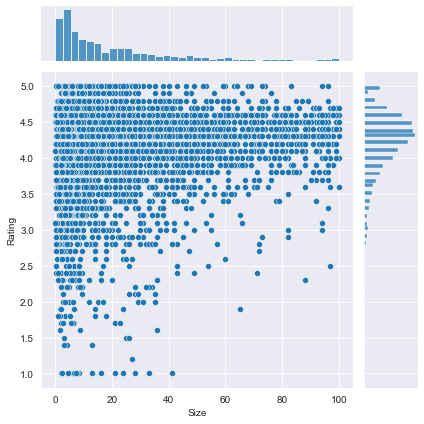

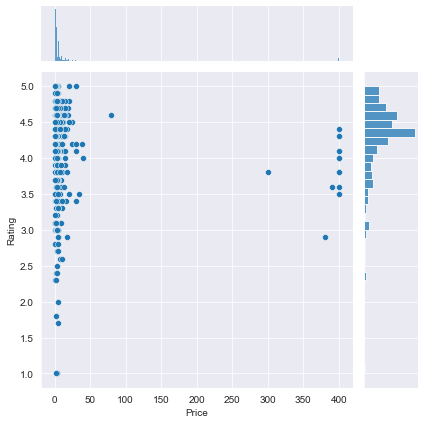

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

#select categories with >= 250 number of apps
large_categories=apps.groupby('Category').filter(lambda x:len(x)>=250)
#create a joint plot
plot_size_rating=sns.jointplot(x=large_categories['Size'],y=large_categories['Rating'])

#select paid apps
paid_apps=apps[apps['Type']=='Paid']
#create a joint plot of Rating as x and Price as y
plot_price_rating=sns.jointplot(x=paid_apps['Price'],y=paid_apps['Rating'])

Majority of paid apps are priced under $50.

<b>Is there any relation between app category and app price?</b>

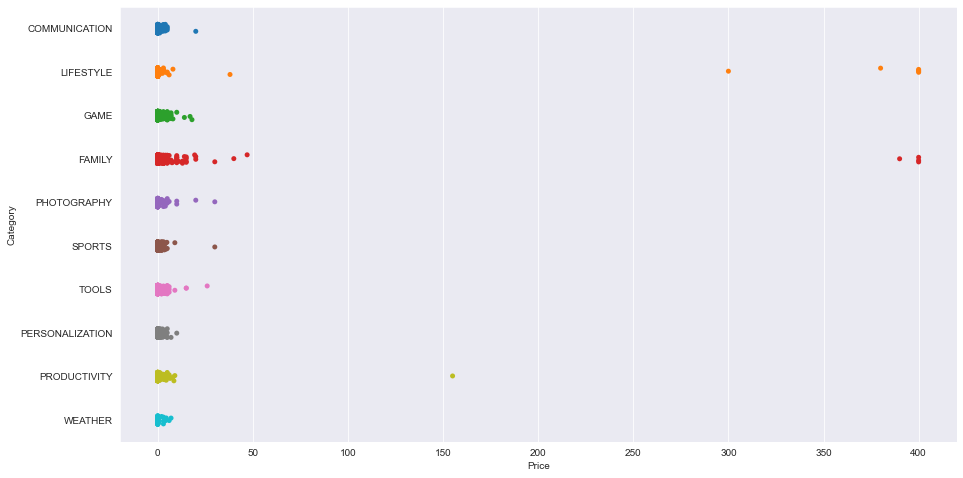

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.set_size_inches(15,8)

#group by category and find the sum of the installs of paid apps
group_category=paid_apps.groupby('Category').agg({'Installs':'sum'})
#sort the categories based on the number of installs
sort_installs=group_category.sort_values(by='Installs', ascending=False)
#get the top 10 categories by number of installs
installs_top10=sort_installs.head(10)
#create list from the index
list_top10=list(installs_top10.index)
#select apps from top 10 categories
category_top10=apps[apps.Category.isin(list_top10)]

#plot price vs category to examine the price trend
ax=sns.stripplot(x=category_top10['Price'],y=category_top10['Category'], jitter=True)

Filter out 'junk' apps

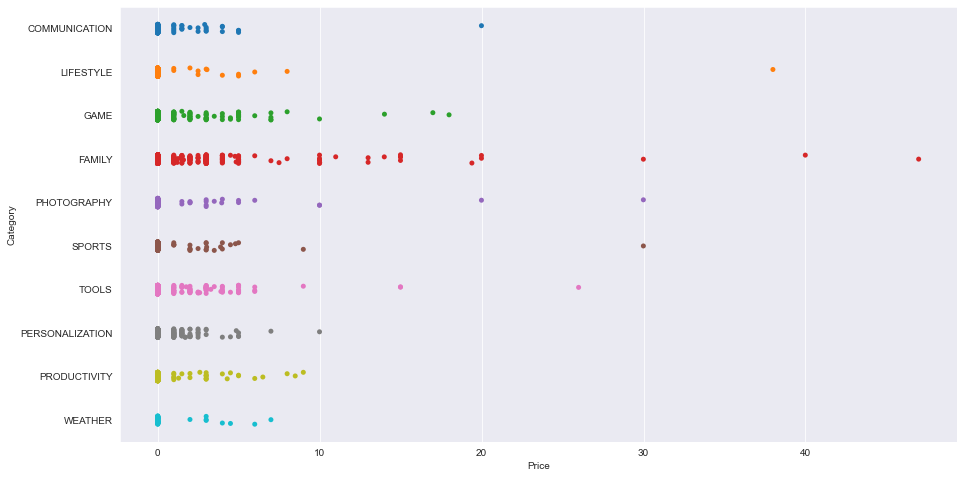

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(15,8)

#filter apps with price more than $100
filter_top10=category_top10[category_top10['Price']<100]
#plot price vs category to examine the price trend
ax=sns.stripplot(x=filter_top10['Price'],y=filter_top10['Category'], jitter=True)

The most expensive app is in medical category.

<b>Which is more popular, paid apps or free apps?</b>

In [ ]:
pop_paid=go.Box(y=apps[apps['Type']=='Paid']['Installs'],name='Paid')
pop_free=go.Box(y=apps[apps['Type']=='Free']['Installs'],name='Free')
pop_layout=go.Layout(title='Number of Installs Paid Apps Vs Free Apps', yaxis=dict(title='Log Number of Installs', type='log', autorange=True))
#create list of pop_paid and pop_free
pop_list=[pop_paid,pop_free]
plotly.offline.iplot({'data':pop_list,'layout':pop_layout})


Free apps have a higher number of installs than paid apps.

<b>Sentiment analysis of user reviews</b>

In [ ]:
#merge reviews and apps DataFrame on App and assign the result to apps_review
apps_review=pd.merge(apps, reviews, on='App')
apps_review.head()
#remove missing values from Sentiment and Review columns
apps_review=apps_review.dropna(subset=['Sentiment', 'Review'])

re_paid=go.Box(y=apps_review[apps_review['Type']=='Paid']['Sentiment_Polarity'],name='Paid')
re_free=go.Box(y=apps_review[apps_review['Type']=='Free']['Sentiment_Polarity'],name='Free')
re_layout=go.Layout(title='Sentiment Polarity Distribution')

re_list=[re_free,re_paid]
plotly.offline.iplot({'data':re_list,'layout':re_layout})

Free apps receive a lot of harsh comments.